In [2]:
import os

base_dir = 'chips'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training defective/nondefective pictures
train_defective_dir = os.path.join(train_dir, 'Defective')
train_nondefective_dir = os.path.join(train_dir, 'Non-Defective')

# Directory with validation defective/nondefective pictures
validation_defective_dir = os.path.join(validation_dir, 'Defective')
validation_nondefective_dir = os.path.join(validation_dir, 'Non-Defective')


train_defective_fnames = os.listdir( train_defective_dir )
train_nondefective_fnames = os.listdir( train_nondefective_dir )

In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

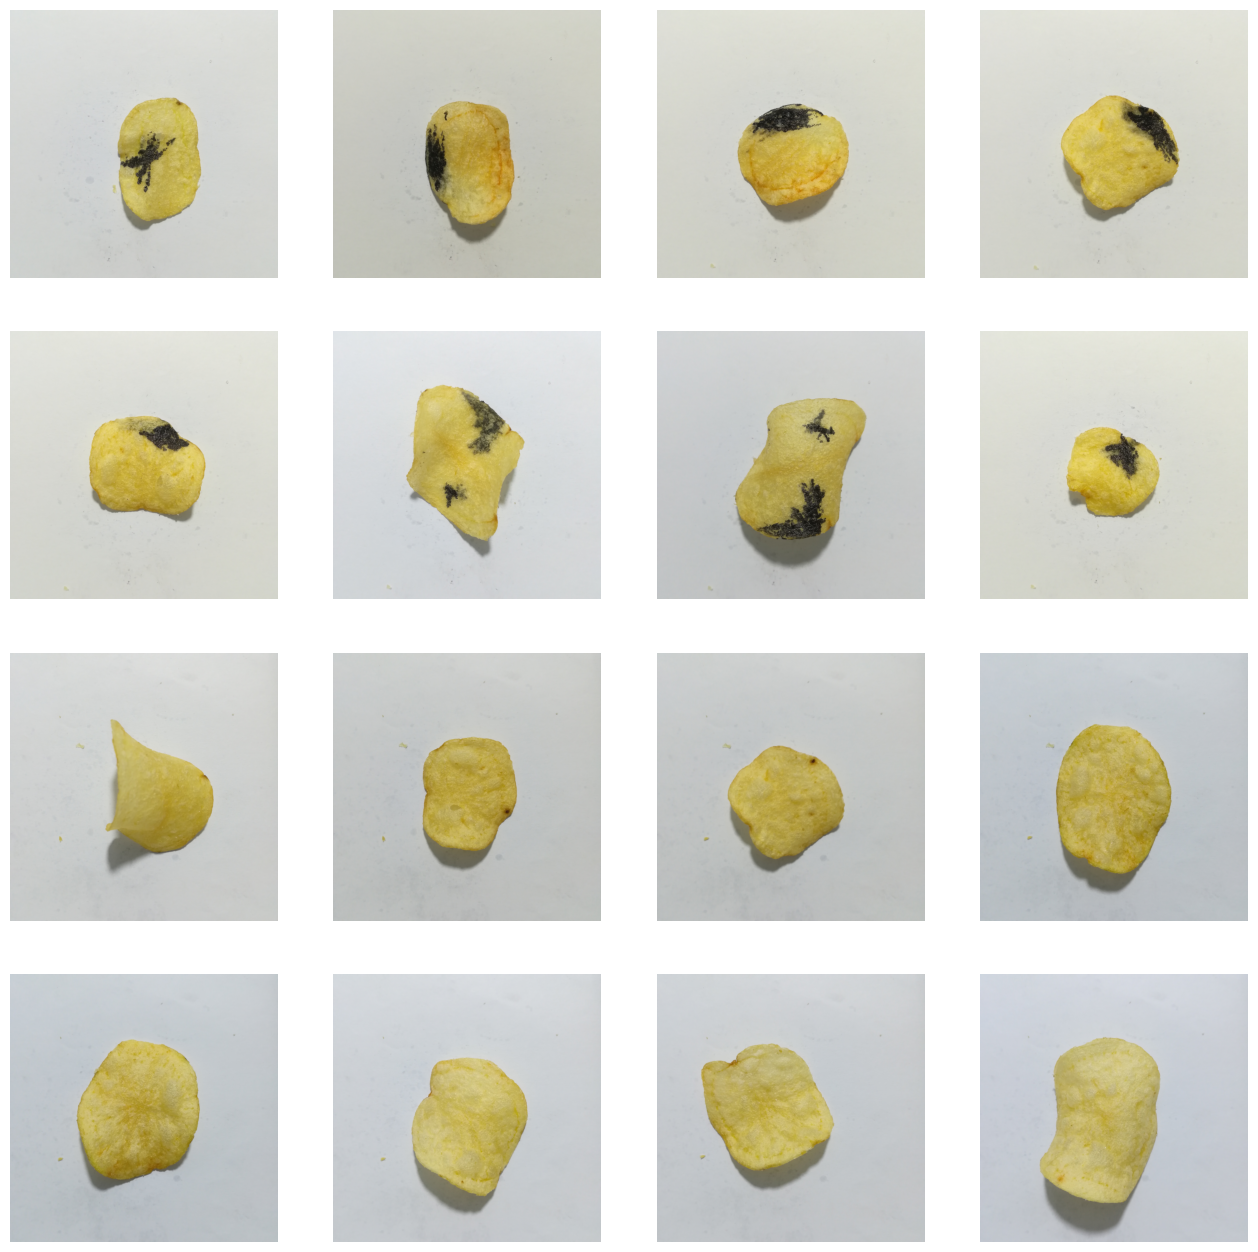

In [4]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_defective_pix = [os.path.join(train_defective_dir, fname) 
                for fname in train_defective_fnames[ pic_index-8:pic_index] 
               ]

next_nondefective_pix = [os.path.join(train_nondefective_dir, fname) 
                for fname in train_nondefective_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('non-defective') and 1 for the other ('defective')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 769 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [9]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
39/39 - 39s - loss: 0.7904 - accuracy: 0.5566 - val_loss: 0.6408 - val_accuracy: 0.6250 - 39s/epoch - 1000ms/step
Epoch 2/15
39/39 - 35s - loss: 0.4594 - accuracy: 0.8166 - val_loss: 0.6204 - val_accuracy: 0.6042 - 35s/epoch - 899ms/step
Epoch 3/15
39/39 - 34s - loss: 0.1917 - accuracy: 0.9389 - val_loss: 0.1192 - val_accuracy: 0.9635 - 34s/epoch - 880ms/step
Epoch 4/15
39/39 - 33s - loss: 0.1651 - accuracy: 0.9493 - val_loss: 0.1234 - val_accuracy: 0.9583 - 33s/epoch - 838ms/step
Epoch 5/15
39/39 - 35s - loss: 0.1011 - accuracy: 0.9701 - val_loss: 0.0757 - val_accuracy: 0.9688 - 35s/epoch - 897ms/step
Epoch 6/15
39/39 - 40s - loss: 0.0705 - accuracy: 0.9766 - val_loss: 0.0404 - val_accuracy: 0.9896 - 40s/epoch - 1s/step
Epoch 7/15
39/39 - 36s - loss: 0.0875 - accuracy: 0.9766 - val_loss: 0.0400 - val_accuracy: 0.9896 - 36s/epoch - 921ms/step
Epoch 8/15
39/39 - 37s - loss: 0.1858 - accuracy: 0.9688 - val_loss: 0.2003 - val_accuracy: 0.9375 - 37s/epoch - 940ms/step
Epoch 9/15

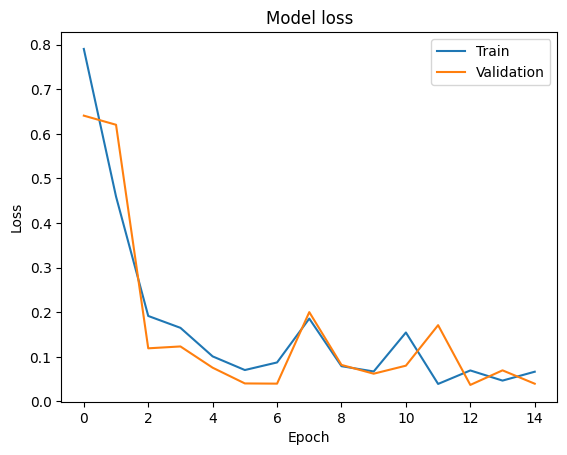

In [10]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training

In [13]:

import numpy as np
import cv2
from tensorflow.keras.utils import load_img, img_to_array

path = input("Specify File Name") + ".jpg"
image=load_img(path, target_size=(150, 150))
image = img_to_array(image)
image /= 255
image = np.expand_dims(image, axis=0)
images = np.vstack([image])
classes = model.predict(images, batch_size=10)
print(classes[0])
  
if classes[0]>0.5:
    print("chip is nondefective")
else:
    print("chip is defective")

1/1 [==============================] - 0s 83ms/step
[0.02181655]
chip is defective


1/1 [==============================] - 0s 70ms/step


C:\Users\UrAvgProGamer\AppData\Local\Temp\ipykernel_7836\4127843963.py:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


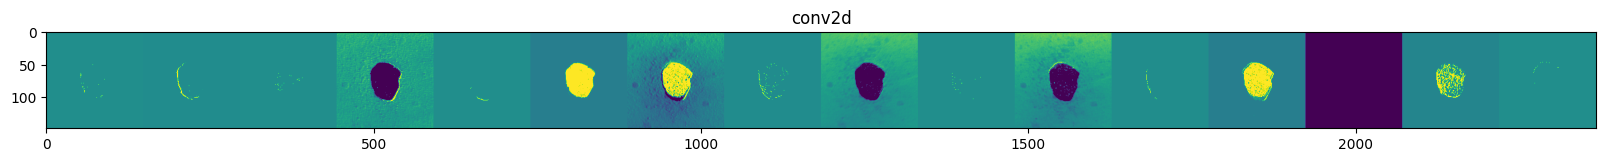

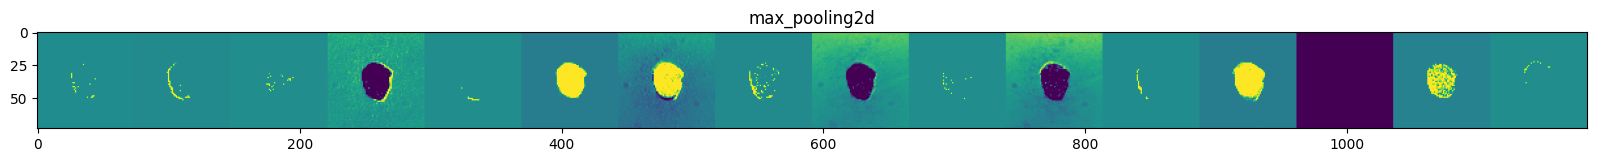

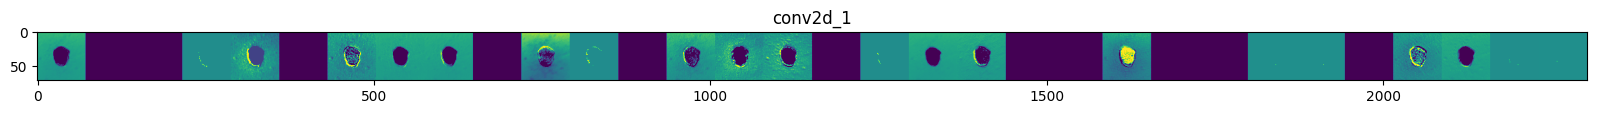

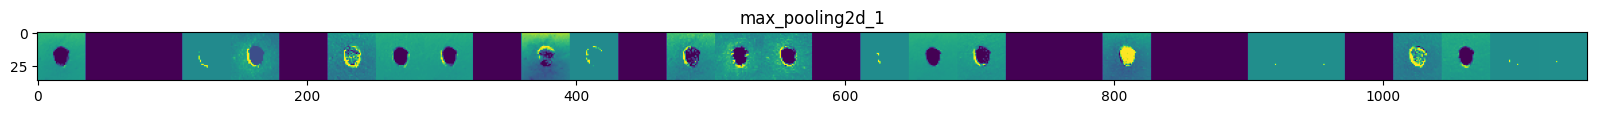

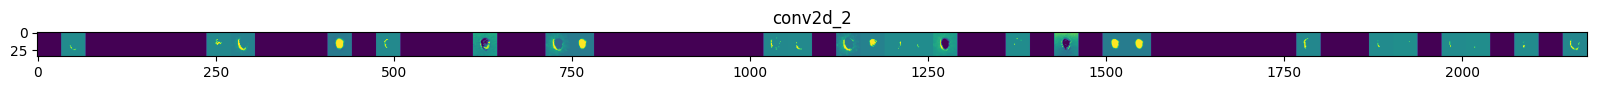

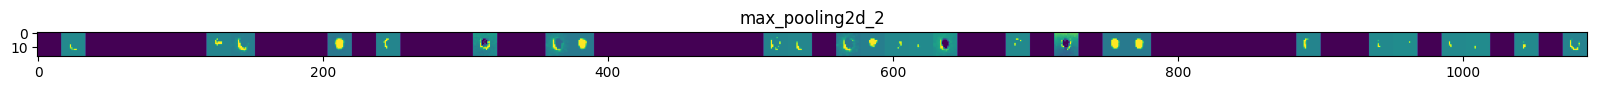

In [14]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
defective_img_files = [os.path.join(train_defective_dir, f) for f in train_defective_fnames]
nondefective_img_files = [os.path.join(train_nondefective_dir, f) for f in train_nondefective_fnames]
img_path = random.choice(defective_img_files + nondefective_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

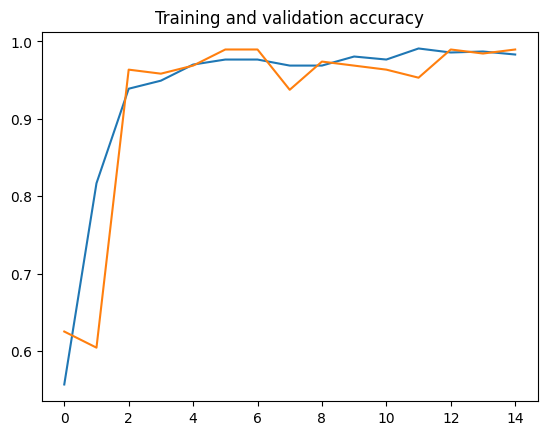

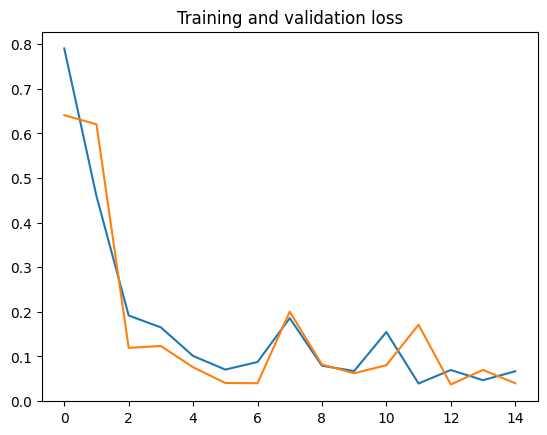

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [16]:
from tensorflow.keras.models import load_model

# Save the model to a file
model.save('model.h5')

In [17]:
from tensorflow.keras.models import save_model, load_model

# Save the model to a SavedModel directory
save_model(model, 'saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [ ]:
from tensorflow.keras.models import load_model

# Recreate the model from the saved file
model = load_model('model.h5')

In [ ]:
from tensorflow.keras.models import save_model, load_model

# Recreate the model from the SavedModel directory
model = load_model